In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the data set file

In [5]:
df= pd.read_csv("C:\\Users\\asheesh\\Documents\\menka\\Data Scientist\\ML\\ASSISGNMENT\\Position_Salaries.csv")

In [6]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Performing EDA 

In [7]:
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
df.info()

inference : 2 numerical and 1 categorical column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [9]:
df.nunique()

Position    10
Level       10
Salary      10
dtype: int64

In [10]:
#check for missing values
df.isnull().sum()
Inference : No missing value

Position    0
Level       0
Salary      0
dtype: int64

<AxesSubplot:>

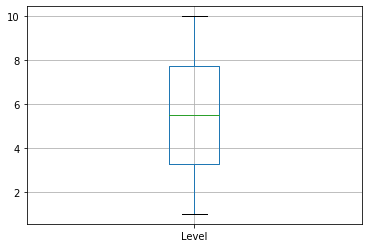

In [22]:
# Check for outliers in Level column


df.boxplot('Level')
#Inference : No outliers

<AxesSubplot:>

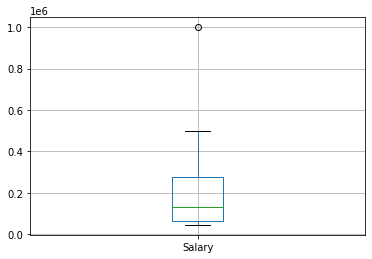

In [18]:
# Check for outliers in Salary column
df.boxplot('Salary')
#Inference : 1 outlier  found check if  it needs to be treated or not

In [23]:
# Check the outlier in salary  to be treated or not
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [33]:
q1= df['Salary'].describe()[4]
q3= df['Salary'].describe()[6]

IQR = q3  - q1
IQR



210000.0

In [34]:
# calculate upperwhisker
upperwhisker = (q3 + (1.5*IQR)).astype(int)

# calculate lowerwhisker
lowerwhisker = (q1 - (1.5*IQR)).astype(int)

print (" Lowerwhisker is ", lowerwhisker , "\n")
print (" Upperwhisker is ", upperwhisker , "\n")


 Lowerwhisker is  -250000 

 Upperwhisker is  590000 



In [36]:
# Identify all the outliers 

df[df['Salary'] > upperwhisker]['Salary']

9    1000000
Name: Salary, dtype: int64

In [37]:
out= len (df[df['Salary'] > upperwhisker]['Salary'])
out

1

In [38]:
#If percent is more than 0.3% we need to handle the outlier
percent = round((out/df.shape[0])*100 , 2)
percent
# Inference :  If percent is more than 0.3% we need to handle the outlier . In this case its 10 % so we will treat the outlier

10.0

In [39]:
df['Salary']= np.where(df['Salary'] > upperwhisker ,upperwhisker , df['Salary'] )

In [40]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,590000


<AxesSubplot:>

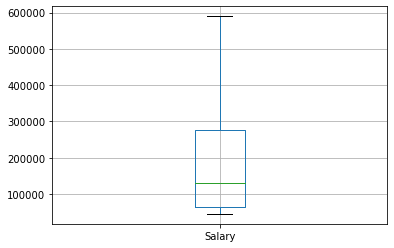

In [41]:
df.boxplot('Salary')
#Inference : The outlier is now treated

# Train and Test the model 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x= df['Level'].values
y= df['Salary'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) 

In [77]:
#import Random Forest regressor model 
from sklearn.ensemble import RandomForestRegressor

# create an instance of Random FoREST model
RF = RandomForestRegressor(n_estimators=3)

In [78]:
# Fit the model after reshaping the train and test data

x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


RF.fit(x_train,y_train.ravel())

RandomForestRegressor(n_estimators=3)

In [79]:
#Predicting the Results
y_predict = RF.predict(x_test)

In [83]:
# Display the actual Vs Predict

df_1 = pd.DataFrame({"Actual Salary ": y_test.reshape(-1),"Predicted Salary ": y_predict.reshape(-1).astype(int) })
df_1

,Actual Salary,Predicted Salary
0,60000,48333
1,590000,433333


In [84]:
# Checking score of training and testting
print ("RF train score with model 1  is :" ,RF.score(x_train,y_train))
print ("\n RF test score with model 1 is :" ,RF.score(x_test,y_test))

RF train score with model 1  is : 0.9663273377654685

 RF test score with model 1 is : 0.824275147343855


# Check the model with different n_estimators values 

In [94]:

for i in range(4,10):
    RF1 = RandomForestRegressor(n_estimators = i)
    RF1.fit(x_train,y_train.ravel())
    print ("n_estimators is : ", i  )
    print ("RF training Score :" , RF1.score(x_train,y_train) )
    print ("RF testing Score :" , RF1.score(x_test,y_test) )
    print ("Predicted Salary for Level 6.5 is :" , RF1.predict([[6.5]]), "\n")
    # Inference : So modeL with estimator 5  is the most generalised so will rely on its prediction value  of 160000

n_estimators is :  4
RF training Score : 0.9354170151861558
RF testing Score : 0.7756318974724101
Predicted Salary for Level 6.5 is : [162500.] 

n_estimators is :  5
RF training Score : 0.9894243387423558
RF testing Score : 0.9422143111427554
Predicted Salary for Level 6.5 is : [160000.] 

n_estimators is :  6
RF training Score : 0.9546418665361397
RF testing Score : 0.7859064119299078
Predicted Salary for Level 6.5 is : [166666.66666667] 

n_estimators is :  7
RF training Score : 0.888792409842987
RF testing Score : 0.6594909946890825
Predicted Salary for Level 6.5 is : [157142.85714286] 

n_estimators is :  8
RF training Score : 0.9377776538597372
RF testing Score : 0.7422570309718761
Predicted Salary for Level 6.5 is : [156250.] 

n_estimators is :  9
RF training Score : 0.9626942443971261
RF testing Score : 0.8251651437838693
Predicted Salary for Level 6.5 is : [167777.77777778] 



# Conclusion

In [ ]:
# Inference:The candidate was telling the truth as with model with n_estimator=5(high score),predicted the exact salary 160000